In [1]:
import cmocean.cm as cm
import h5py
import matplotlib as mpl
import matplotlib.colorbar as colorbar
import matplotlib.colors as mplcolours
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

%matplotlib inline

In [2]:
mesh = xr.open_dataset('~/MEOPAR/grid/mesh_mask201702.nc')

In [4]:
oil0d2000 = pd.read_csv('/data/sallen/results/MIDOSS/ParticleNoTests/SoG_2000_AKNS/resOilOutput.sro', sep='\s+', skiprows=4)
oil0d2000 = oil0d2000.drop([0], axis=0)
length =len(oil0d2000)
oil0d2000 = oil0d2000.drop([length-3, length-2, length-1, length], axis=0)

oil0d5000 = pd.read_csv('/data/sallen/results/MIDOSS/ParticleNoTests/SoG_5000_AKNS/resOilOutput.sro', sep='\s+', skiprows=4)
oil0d5000 = oil0d5000.drop([0], axis=0)
length =len(oil0d5000)
oil0d5000 = oil0d5000.drop([length-3, length-2, length-1, length], axis=0)

oil0d10k = pd.read_csv('/data/sallen/results/MIDOSS/ParticleNoTests/SoG_10000_AKNS/resOilOutput.sro', sep='\s+', skiprows=4)
oil0d10k = oil0d10k.drop([0], axis=0)
length =len(oil0d10k)
oil0d10k = oil0d10k.drop([length-3, length-2, length-1, length], axis=0)

oil0d20k = pd.read_csv('/data/sallen/results/MIDOSS/ParticleNoTests/SoG_20000_AKNS/resOilOutput.sro', sep='\s+', skiprows=4)
oil0d20k = oil0d20k.drop([0], axis=0)
length =len(oil0d20k)
oil0d20k = oil0d20k.drop([length-3, length-2, length-1, length], axis=0)

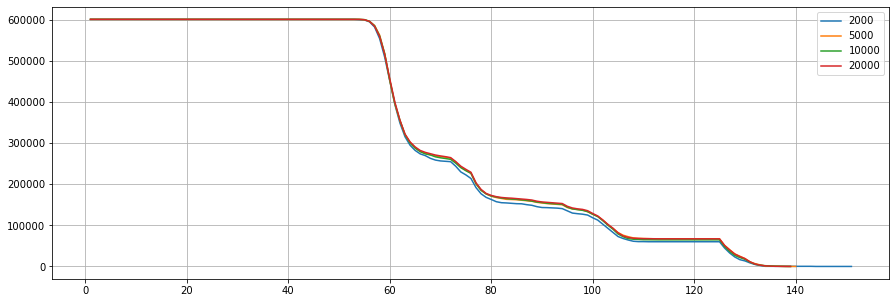

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(15,5))
oil0d2000.Area.plot(ax=ax, label="2000");
oil0d5000.Area.plot(ax=ax, label="5000");
oil0d10k.Area.plot(ax=ax, label="10000");
oil0d20k.Area.plot(ax=ax, label="20000");
plt.grid();
plt.legend();

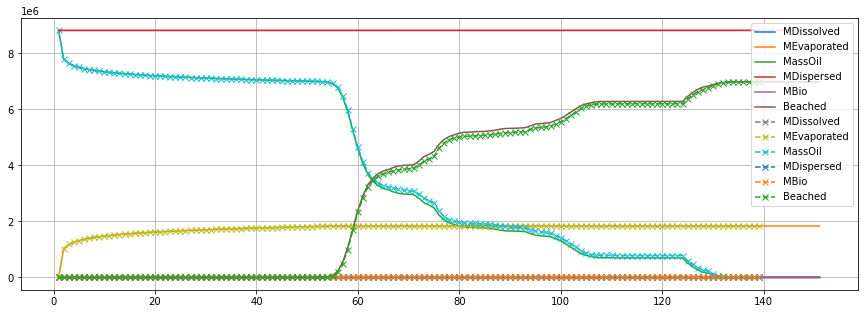

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(15,5))
oil0d2000.MDissolved.plot();
oil0d2000.MEvaporated.plot();
oil0d2000.MassOil.plot();
oil0d2000.MDispersed.plot();
oil0d2000.MBio.plot()
massbeached2 = (oil0d2000.VolOilBeached*oil0d2000.Density/(1-oil0d2000.VWaterContent)
    *(1-oil0d2000.MWaterContent))

massbeached2.plot(label="Beached")

plt.plot(oil0d2000.MDissolved + oil0d2000.MEvaporated + oil0d2000.MassOil 
         + massbeached2 + oil0d2000.MDispersed + oil0d2000.MBio);

oil0d20k.MDissolved.plot(style='--x');
oil0d20k.MEvaporated.plot(style='--x');
oil0d20k.MassOil.plot(style='--x');
oil0d20k.MDispersed.plot(style='--x');
oil0d20k.MBio.plot(style='--x')
massbeached20 = (oil0d20k.VolOilBeached*oil0d20k.Density/(1-oil0d20k.VWaterContent)
    *(1-oil0d20k.MWaterContent))
massbeached10 = (oil0d10k.VolOilBeached*oil0d10k.Density/(1-oil0d10k.VWaterContent)
    *(1-oil0d10k.MWaterContent))

massbeached5 = (oil0d5000.VolOilBeached*oil0d5000.Density/(1-oil0d5000.VWaterContent)
    *(1-oil0d5000.MWaterContent))

massbeached20.plot(label="Beached", style='--x')

plt.plot(oil0d20k.MDissolved + oil0d20k.MEvaporated + oil0d20k.MassOil 
         + massbeached20 + oil0d20k.MDispersed + oil0d20k.MBio);


plt.legend();
plt.grid();

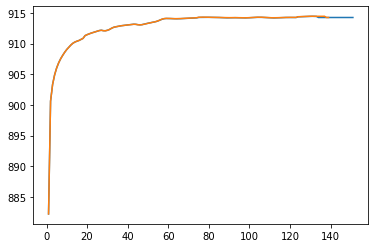

In [7]:
(oil0d2000.Density/(1-oil0d2000.VWaterContent)
    *(1-oil0d2000.MWaterContent)).plot();
(oil0d20k.Density/(1-oil0d20k.VWaterContent)
    *(1-oil0d20k.MWaterContent)).plot();

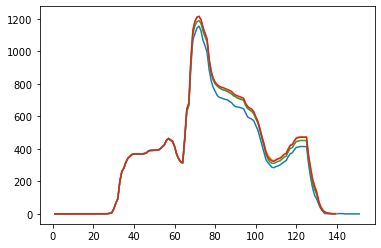

In [8]:
oil0d2000.MDispersed.plot();
oil0d5000.MDispersed.plot();
oil0d10k.MDispersed.plot();
oil0d20k.MDispersed.plot();

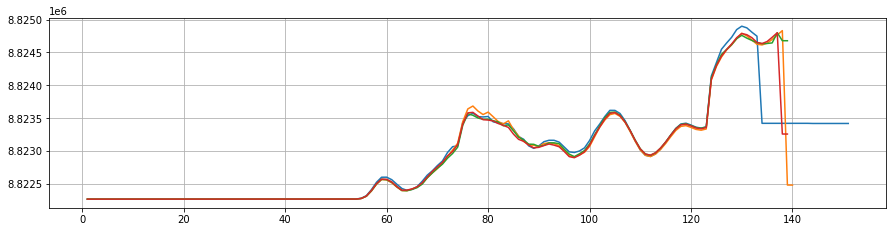

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(15, 3.5))
ax.plot(oil0d2000.MDissolved + oil0d2000.MEvaporated + oil0d2000.MassOil 
         + massbeached2 + oil0d2000.MDispersed + oil0d2000.MBio);
ax.plot(oil0d5000.MDissolved + oil0d5000.MEvaporated + oil0d5000.MassOil 
         + massbeached5 + oil0d5000.MDispersed + oil0d5000.MBio);
ax.plot(oil0d10k.MDissolved + oil0d10k.MEvaporated + oil0d10k.MassOil 
         + massbeached10 + oil0d10k.MDispersed + oil0d10k.MBio);
ax.plot(oil0d20k.MDissolved + oil0d20k.MEvaporated + oil0d20k.MassOil 
         + massbeached20 + oil0d20k.MDispersed + oil0d20k.MBio);
ax.grid();

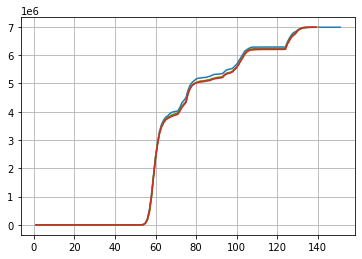

In [10]:
massbeached2.plot(label="Beached");
massbeached5.plot(label="Beached");
massbeached10.plot(label="Beached");
massbeached20.plot(label="Beached");
plt.grid()

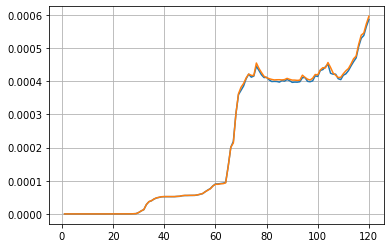

In [12]:
(oil0d2000.MDispersed/(oil0d2000.MDispersed + oil0d2000.MassOil))[:120].plot()
(oil0d20k.MDispersed/(oil0d20k.MDispersed + oil0d20k.MassOil))[:120].plot()
plt.grid()

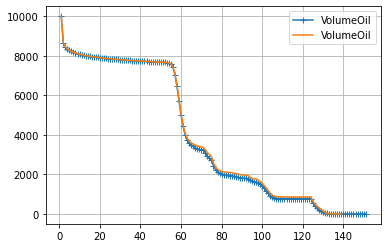

In [13]:
oil0d2000.VolumeOil.plot(style='+-');
oil0d20k.VolumeOil.plot();
plt.legend();
plt.grid();

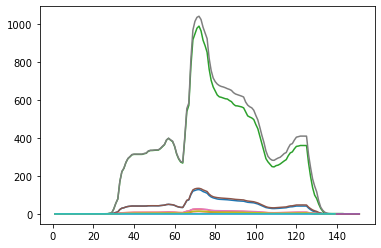

In [14]:
oil0d2000.AnalyteMass1.plot()
oil0d2000.AnalyteMass2.plot()
oil0d2000.AnalyteMass3.plot()
oil0d2000.AnalyteMass4.plot()
oil0d2000.AnalyteMass5.plot();
oil0d20k.AnalyteMass1.plot()
oil0d20k.AnalyteMass2.plot()
oil0d20k.AnalyteMass3.plot()
oil0d20k.AnalyteMass4.plot()
oil0d20k.AnalyteMass5.plot();

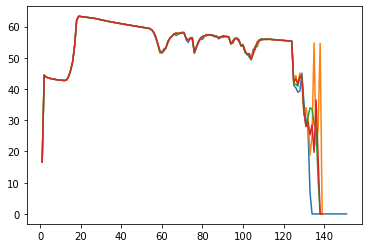

In [15]:
oil0d2000.Thickness.plot();
oil0d5000.Thickness.plot();
oil0d10k.Thickness.plot();
oil0d20k.Thickness.plot();

In [16]:
oilLag2000 = xr.open_dataset('/data/sallen/results/MIDOSS/ParticleNoTests/SoG_2000_AKNS/Lagrangian_SoG_2000_AKNS_SoG_2000_AKNS.nc')
oilLag5000 = xr.open_dataset('/data/sallen/results/MIDOSS/ParticleNoTests/SoG_5000_AKNS/Lagrangian_SoG_5000_AKNS_SoG_5000_AKNS.nc')
oilLag10k = xr.open_dataset('/data/sallen/results/MIDOSS/ParticleNoTests/SoG_10000_AKNS/Lagrangian_SoG_10000_AKNS_SoG_10000_AKNS.nc')
oilLag20k = xr.open_dataset('/data/sallen/results/MIDOSS/ParticleNoTests/SoG_20000_AKNS/Lagrangian_SoG_20000_AKNS_SoG_20000_AKNS.nc')

In [17]:
imin, imax = 460, 560
jmin, jmax = 180, 260

<xarray.DataArray 'OilWaterColumnOilVol_3D' ()>
array(7889.4208)
Coordinates:
    time     datetime64[ns] 2018-01-15T20:30:00
<xarray.DataArray 'OilWaterColumnOilVol_3D' ()>
array(7889.4634)
Coordinates:
    time     datetime64[ns] 2018-01-15T20:30:00
<xarray.DataArray 'OilWaterColumnOilVol_3D' ()>
array(7889.4511)
Coordinates:
    time     datetime64[ns] 2018-01-15T20:30:00
<xarray.DataArray 'OilWaterColumnOilVol_3D' ()>
array(7889.4518)
Coordinates:
    time     datetime64[ns] 2018-01-15T20:30:00


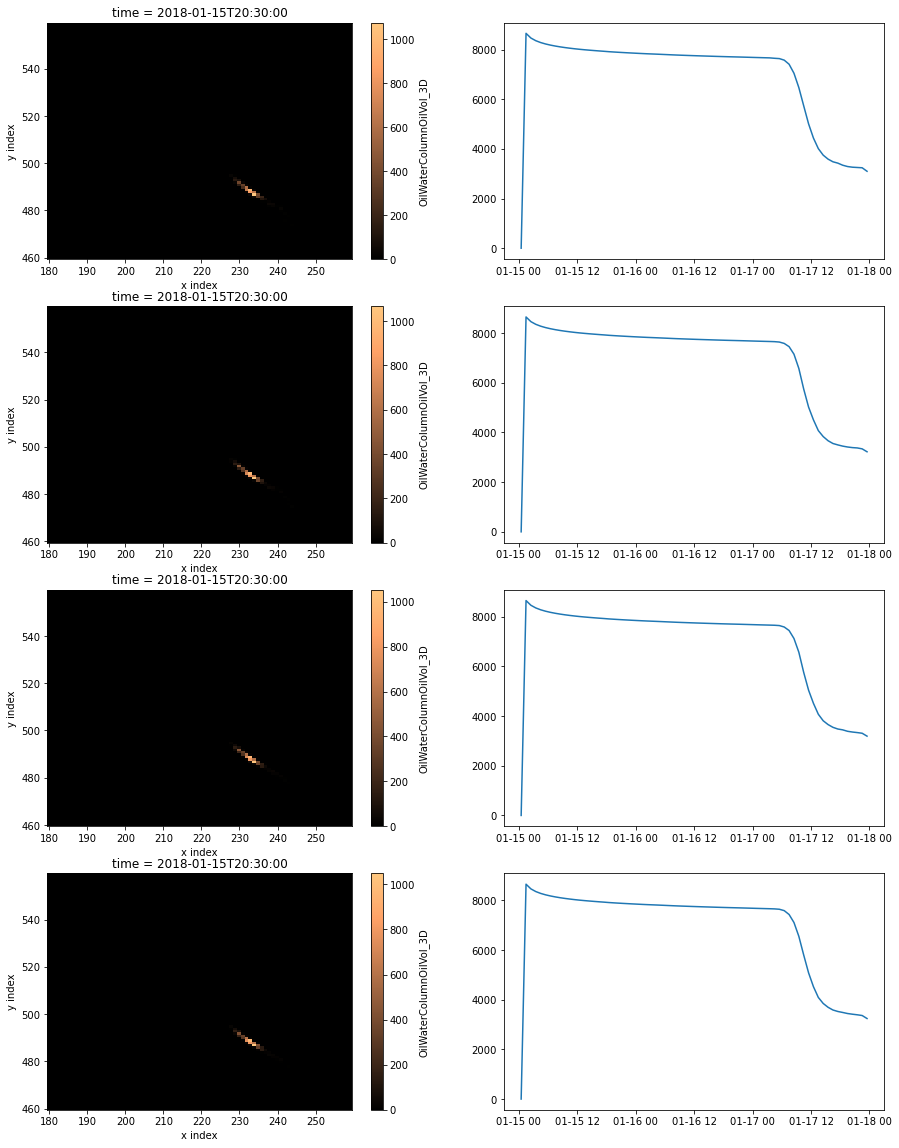

In [18]:
fig, axs = plt.subplots(4, 2, figsize=(15, 20))
it = 20

field = oilLag2000.OilWaterColumnOilVol_3D[it]
(field[:, imin:imax , jmin:jmax].sum(axis=0)).plot(ax=axs[0, 0], cmap='copper')
print (oilLag2000.OilWaterColumnOilVol_3D[it, :, imin:imax, jmin:jmax].sum(axis=0).sum(axis=0).sum(axis=0))

axs[0, 1].plot(oilLag2000.time[0:72], oilLag2000.OilWaterColumnOilVol_3D[0:72].sum(axis=1).sum(axis=1).sum(axis=1)
           )

field = oilLag5000.OilWaterColumnOilVol_3D[it]
(field[:, imin:imax , jmin:jmax].sum(axis=0)).plot(ax=axs[1, 0], cmap='copper')
print (oilLag5000.OilWaterColumnOilVol_3D[it, :, imin:imax, jmin:jmax].sum(axis=0).sum(axis=0).sum(axis=0))

axs[1, 1].plot(oilLag5000.time[0:72], oilLag5000.OilWaterColumnOilVol_3D[0:72].sum(axis=1).sum(axis=1).sum(axis=1)
           )

field = oilLag10k.OilWaterColumnOilVol_3D[it]
(field[:, imin:imax , jmin:jmax].sum(axis=0)).plot(ax=axs[2, 0], cmap='copper')
print (oilLag10k.OilWaterColumnOilVol_3D[it, :, imin:imax, jmin:jmax].sum(axis=0).sum(axis=0).sum(axis=0))

axs[2, 1].plot(oilLag10k.time[0:72], oilLag10k.OilWaterColumnOilVol_3D[0:72].sum(axis=1).sum(axis=1).sum(axis=1)
           )

field = oilLag20k.OilWaterColumnOilVol_3D[it]
(field[:, imin:imax , jmin:jmax].sum(axis=0)).plot(ax=axs[3, 0], cmap='copper')
print (oilLag20k.OilWaterColumnOilVol_3D[it, :, imin:imax, jmin:jmax].sum(axis=0).sum(axis=0).sum(axis=0))

axs[3, 1].plot(oilLag20k.time[0:72], oilLag20k.OilWaterColumnOilVol_3D[0:72].sum(axis=1).sum(axis=1).sum(axis=1)
           )

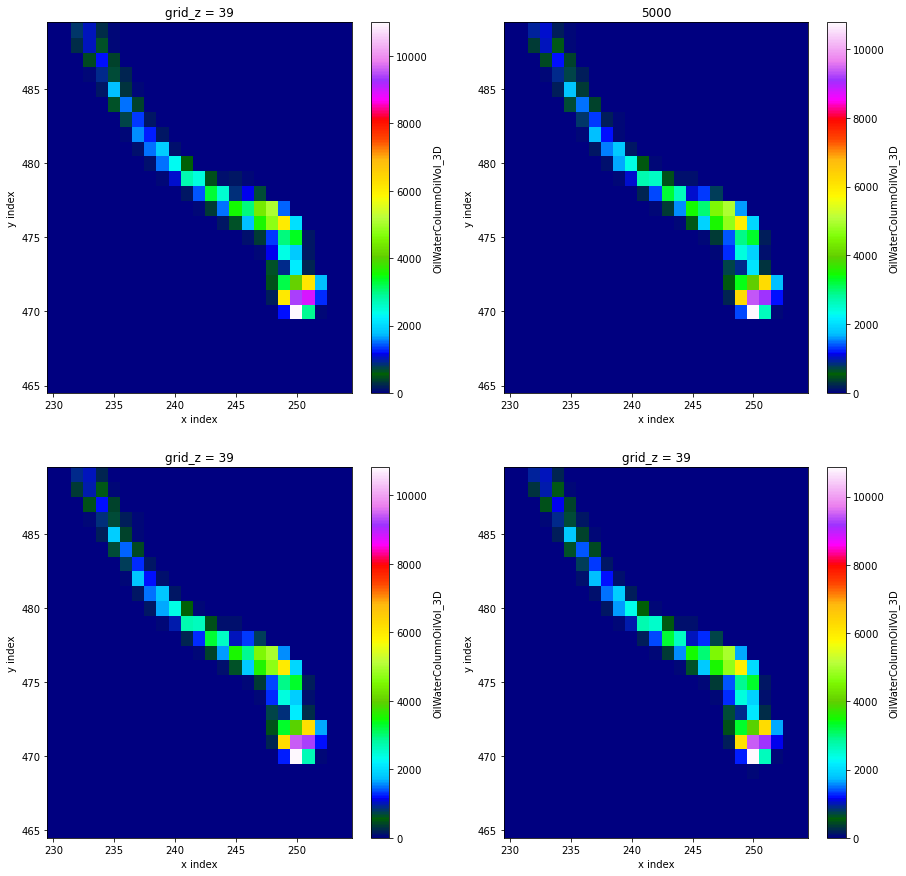

In [19]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
imin, imax = 465, 490
jmin, jmax = 230, 255
oilLag2000.OilWaterColumnOilVol_3D[:, 39, imin:imax, jmin:jmax].sum(axis=0).plot(ax=axs[0, 0], cmap='gist_ncar');
oilLag5000.OilWaterColumnOilVol_3D[:, 39, imin:imax, jmin:jmax].sum(axis=0).plot(ax=axs[0, 1], cmap='gist_ncar');
oilLag10k.OilWaterColumnOilVol_3D[:, 39, imin:imax, jmin:jmax].sum(axis=0).plot(ax=axs[1, 0], cmap='gist_ncar');
oilLag20k.OilWaterColumnOilVol_3D[:, 39, imin:imax, jmin:jmax].sum(axis=0).plot(ax=axs[1, 1], cmap='gist_ncar');
axs[0, 1].set_title('5000');

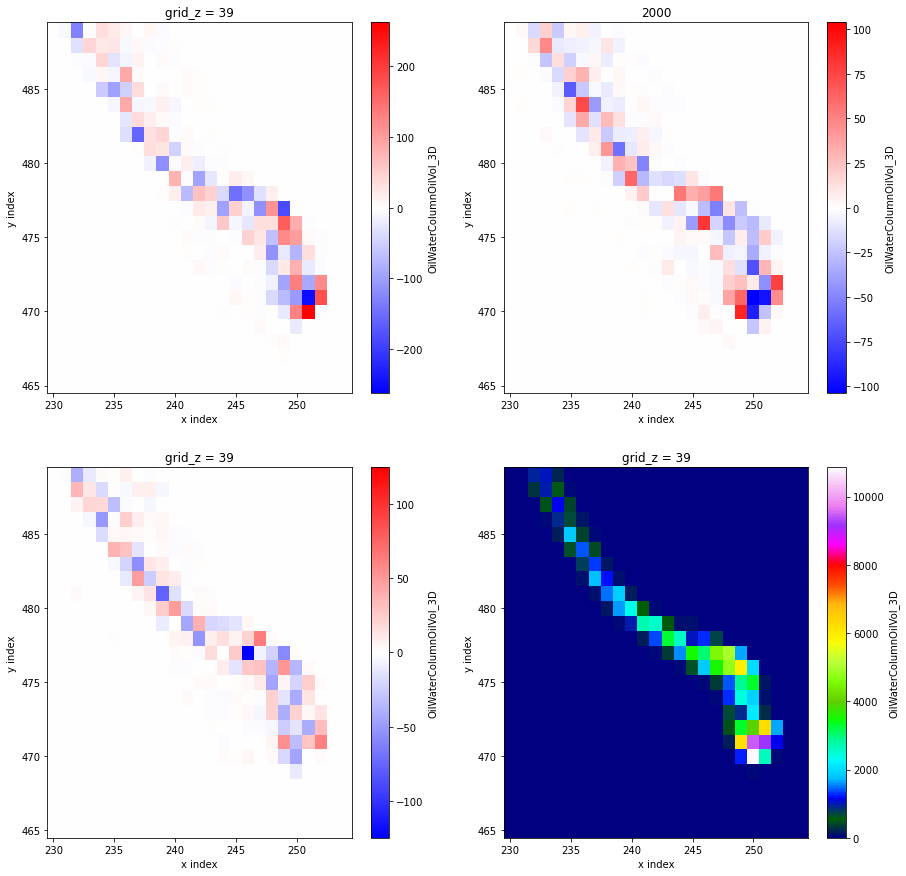

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
(oilLag2000.OilWaterColumnOilVol_3D[:, 39, imin:imax, jmin:jmax].sum(axis=0)-
 oilLag20k.OilWaterColumnOilVol_3D[:, 39, imin:imax, jmin:jmax].sum(axis=0)).plot(ax=axs[0, 0], cmap='bwr');
(oilLag5000.OilWaterColumnOilVol_3D[:, 39, imin:imax, jmin:jmax].sum(axis=0)-
 oilLag20k.OilWaterColumnOilVol_3D[:, 39, imin:imax, jmin:jmax].sum(axis=0)).plot(ax=axs[0, 1], cmap='bwr');
(oilLag10k.OilWaterColumnOilVol_3D[:, 39, imin:imax, jmin:jmax].sum(axis=0)-
 oilLag20k.OilWaterColumnOilVol_3D[:, 39, imin:imax, jmin:jmax].sum(axis=0)).plot(ax=axs[1, 0], cmap='bwr');
oilLag20k.OilWaterColumnOilVol_3D[:, 39, imin:imax, jmin:jmax].sum(axis=0).plot(ax=axs[1, 1], cmap='gist_ncar');
axs[0, 1].set_title('2000');

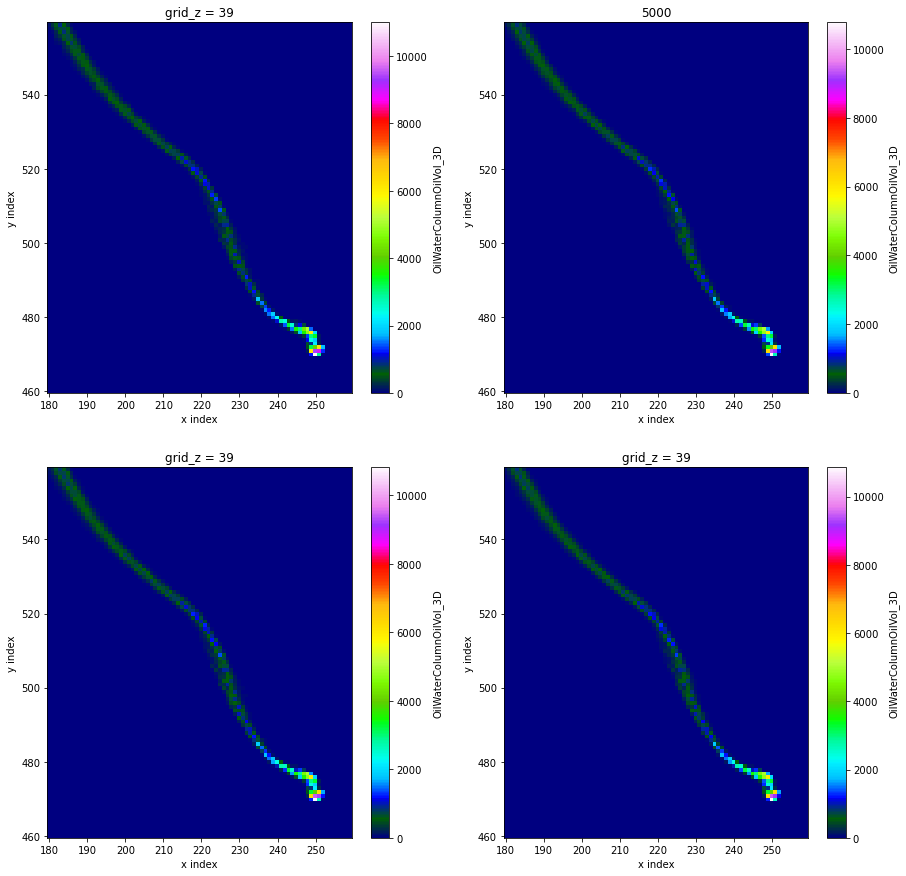

In [21]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
imin, imax = 460, 560
jmin, jmax = 180, 260
oilLag2000.OilWaterColumnOilVol_3D[:, 39, imin:imax, jmin:jmax].sum(axis=0).plot(ax=axs[0, 0], cmap='gist_ncar');
oilLag5000.OilWaterColumnOilVol_3D[:, 39, imin:imax, jmin:jmax].sum(axis=0).plot(ax=axs[0, 1], cmap='gist_ncar');
oilLag10k.OilWaterColumnOilVol_3D[:, 39, imin:imax, jmin:jmax].sum(axis=0).plot(ax=axs[1, 0], cmap='gist_ncar');
oilLag20k.OilWaterColumnOilVol_3D[:, 39, imin:imax, jmin:jmax].sum(axis=0).plot(ax=axs[1, 1], cmap='gist_ncar');
axs[0, 1].set_title('5000');

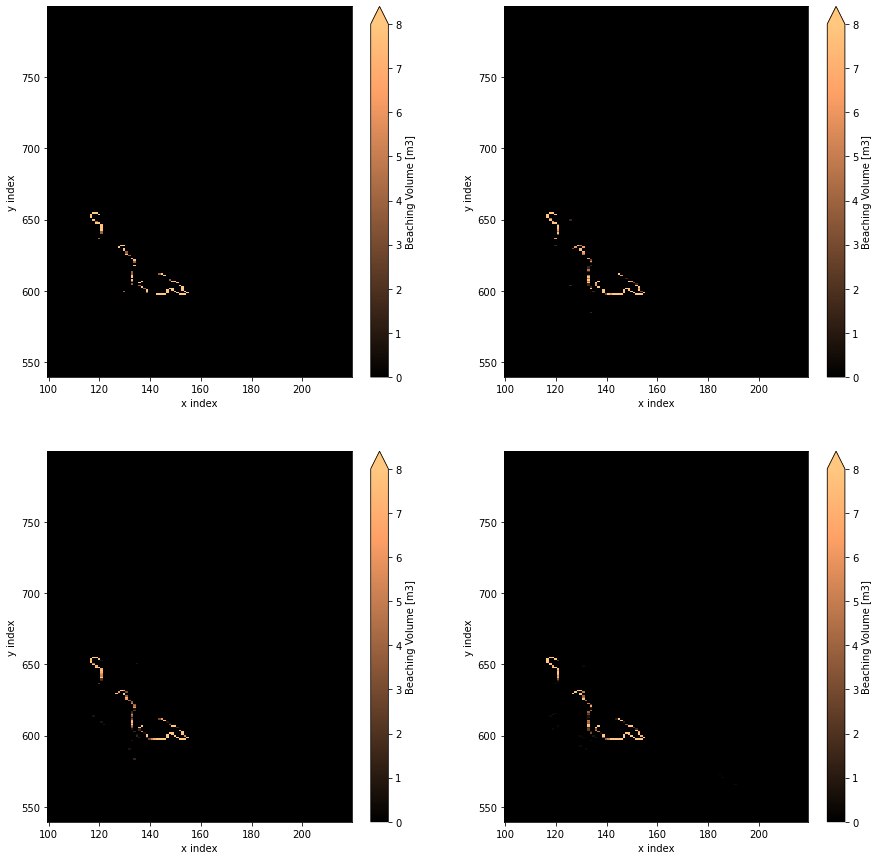

In [22]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
imin, imax = 540, 800
jmin, jmax = 100, 220
oilLag2000.Beaching_Volume[imin:imax , jmin:jmax].plot(ax=axs[0,0], cmap='copper', vmax=8)
oilLag5000.Beaching_Volume[imin:imax , jmin:jmax].plot(ax=axs[0,1], cmap='copper', vmax=8)
oilLag10k.Beaching_Volume[imin:imax , jmin:jmax].plot(ax=axs[1,0], cmap='copper', vmax=8)
oilLag20k.Beaching_Volume[imin:imax , jmin:jmax].plot(ax=axs[1,1], cmap='copper', vmax=8);

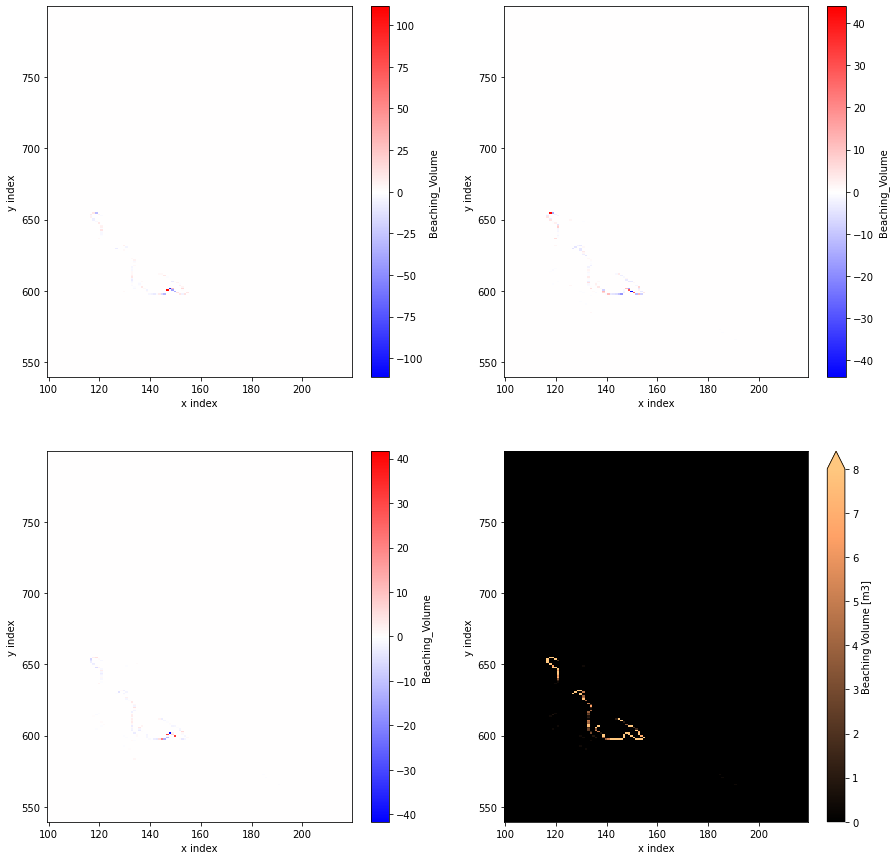

In [23]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

(oilLag2000.Beaching_Volume[imin:imax , jmin:jmax]
 -oilLag20k.Beaching_Volume[imin:imax , jmin:jmax]).plot(ax=axs[0,0], cmap='bwr')

(oilLag5000.Beaching_Volume[imin:imax , jmin:jmax]-
 oilLag20k.Beaching_Volume[imin:imax , jmin:jmax]).plot(ax=axs[0,1], cmap='bwr')

(oilLag10k.Beaching_Volume[imin:imax , jmin:jmax]-
 oilLag20k.Beaching_Volume[imin:imax , jmin:jmax]).plot(ax=axs[1,0], cmap='bwr')

oilLag20k.Beaching_Volume[imin:imax , jmin:jmax].plot(ax=axs[1,1], cmap='copper', vmax=8);


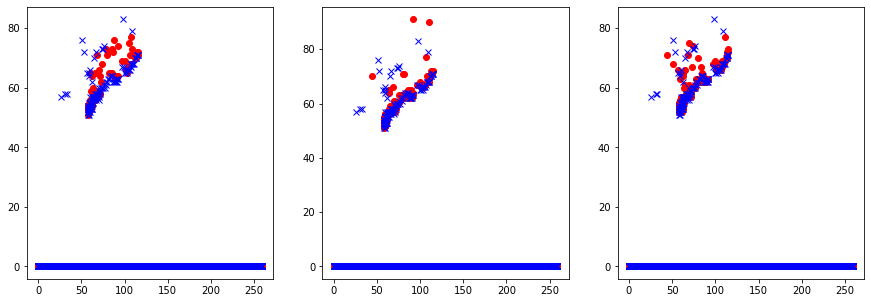

In [24]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
bt2000 = np.array(oilLag2000.Beaching_Time[imin:imax, jmin:jmax] - oilLag2000.Beaching_Time[imin:imax, jmin:jmax].min())
axs[0].plot(bt2000/1e9/3600, 'ro');
bt5000 = np.array(oilLag5000.Beaching_Time[imin:imax, jmin:jmax] - oilLag5000.Beaching_Time[imin:imax, jmin:jmax].min())
axs[1].plot(bt5000/1e9/3600, 'ro');
bt10k = np.array(oilLag10k.Beaching_Time[imin:imax, jmin:jmax] - oilLag10k.Beaching_Time[imin:imax, jmin:jmax].min())
axs[2].plot(bt10k/1e9/3600, 'ro');
bt20k = np.array(oilLag20k.Beaching_Time[imin:imax, jmin:jmax] - oilLag20k.Beaching_Time[imin:imax, jmin:jmax].min())
for ax in axs:
    ax.plot(bt20k/1e9/3600, 'bx');

Time to Run:
* 2000 : 1:55
* 5000 : 2:06
* 10000 : 2:08
* 20000 : 2:23